In [13]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
import warnings
warnings.filterwarnings("ignore")

sns.set() # set the default Seaborn style for graphics

In [14]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [17]:
chd = pd.DataFrame(df['TenYearCHD']) 
cig = pd.DataFrame(df['cigsPerDay'])  # Retargetsponse  

In [18]:
# Train Set : 600 samples
cig_train = pd.DataFrame(cig[:600])
chd_train = pd.DataFrame(chd[:600])


# Test Set : 200 samples
cig_test = pd.DataFrame(cig[-200:])
chd_test = pd.DataFrame(chd[-200:])

# Check the sample sizes
print("Train Set :", cig_train.shape, chd_train.shape)
print("Test Set  :", cig_test.shape, chd_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [19]:
# Percentage of null values in each column
(df.isnull().sum()/df.shape[0])*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [20]:
df.education.fillna(0,inplace=True)

In [21]:
df.cigsPerDay.fillna(df.cigsPerDay.where(df.currentSmoker==1).median(),inplace=True)

In [22]:
df.BPMeds.fillna(0,inplace=True)

In [23]:
df['totChol'].fillna(df.totChol.median(),inplace=True)

In [24]:
df['BMI'].fillna(df.BMI.median(),inplace=True)

In [25]:
df['heartRate'].fillna(df['heartRate'].where(df['currentSmoker']==1).median(),inplace=True)

In [26]:
df['glucose'].fillna(df['glucose'].where(df['diabetes']==0).median(),inplace=True)

In [27]:
# Checking if there are any misisng values:
(df.isnull().sum()/df.shape[0])*100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [28]:
# Five point summary of clean data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.0000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.0000,70.0
education,4238.0,1.929920,1.053018,0.00,1.00,2.0,3.0000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.0000,1.0
cigsPerDay,4238.0,9.078339,11.913780,0.00,0.00,0.0,20.0000,70.0
BPMeds,4238.0,0.029259,0.168552,0.00,0.00,0.0,0.0000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.0000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.0000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.0000,1.0
totChol,4238.0,236.689476,44.327427,107.00,206.00,234.0,262.0000,696.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [30]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [31]:
col = ['age','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

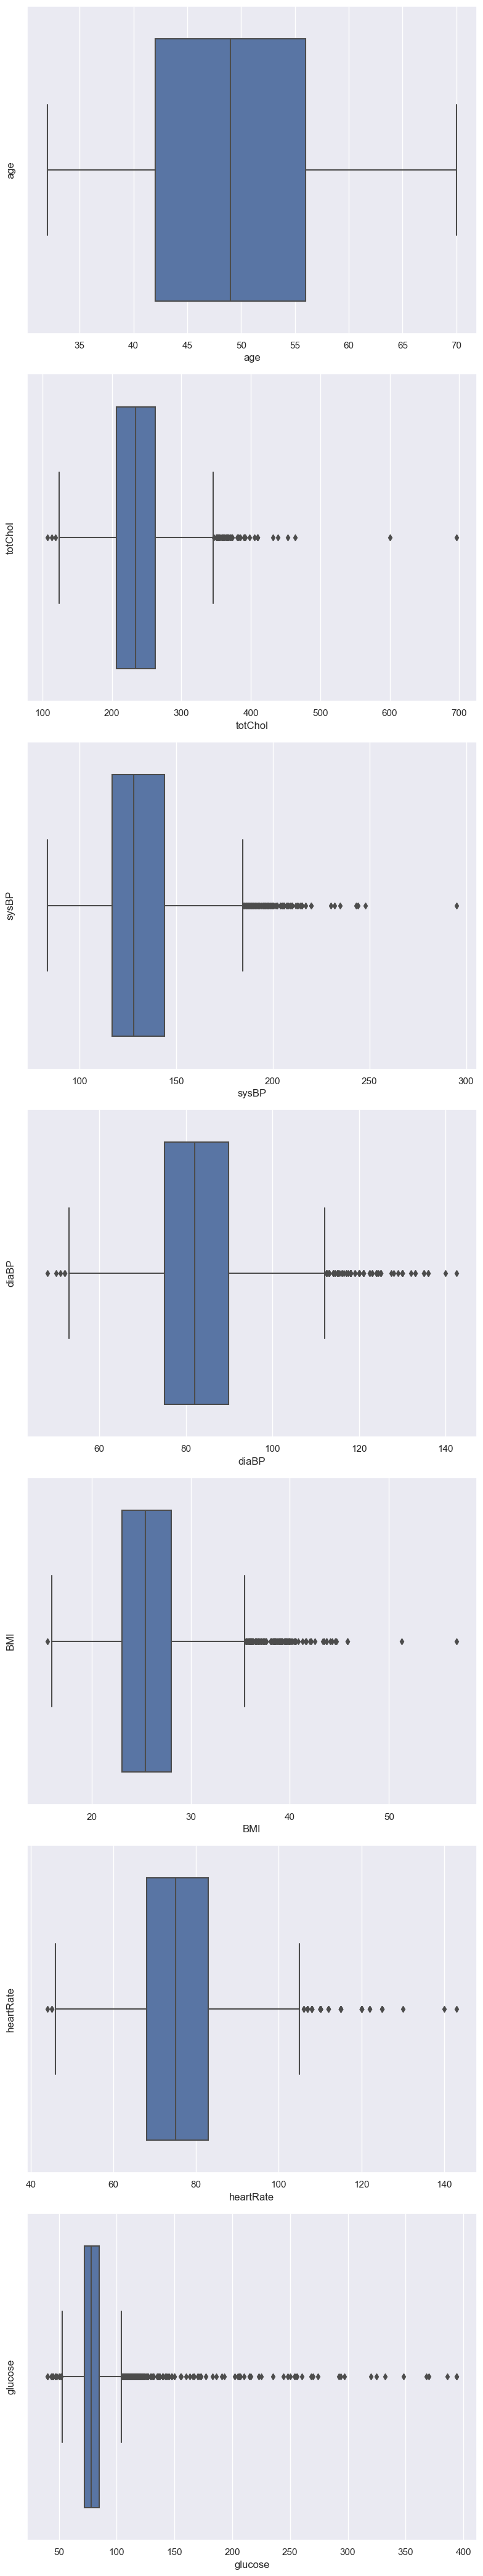

In [32]:
# Create subplots
fig, ax = plt.subplots(nrows=len(col), ncols=1, figsize=(8, 6*len(col)))

# Loop through each column to create horizontal boxplot
for i, column in enumerate(col):
    sns.boxplot(x=df[column], orient='h', ax=ax[i], showfliers=True)
    ax[i].set_ylabel(column)  # Set label for the current boxplot

plt.tight_layout()
plt.show()

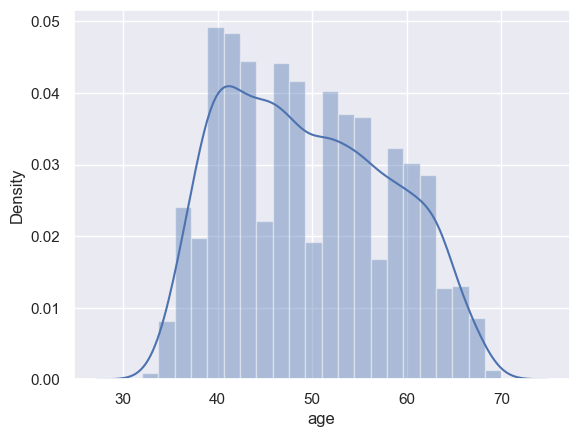

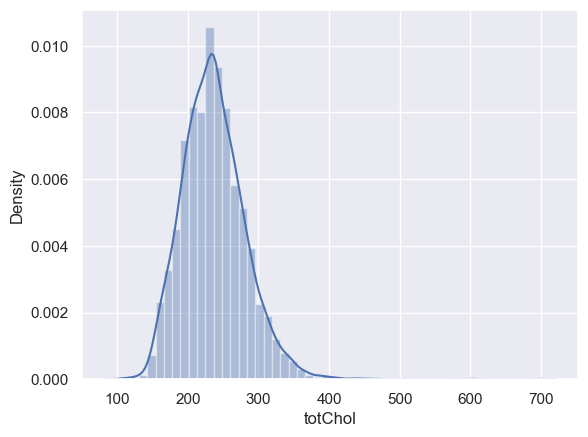

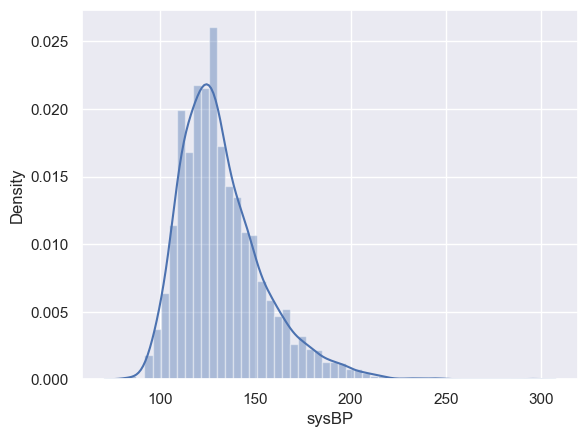

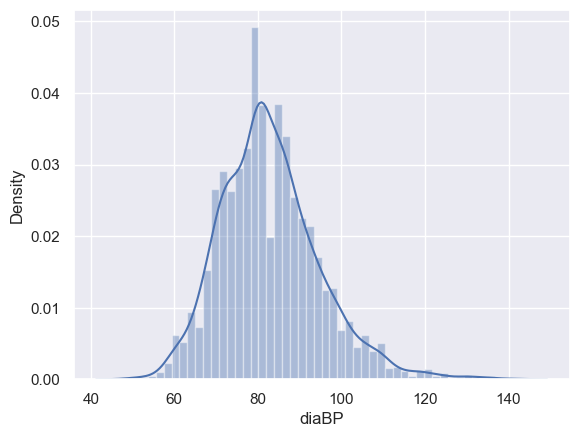

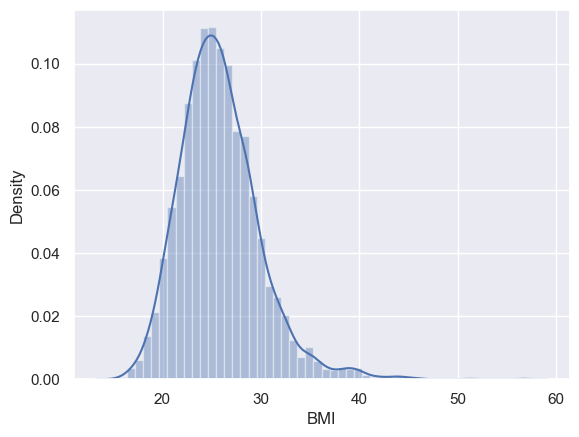

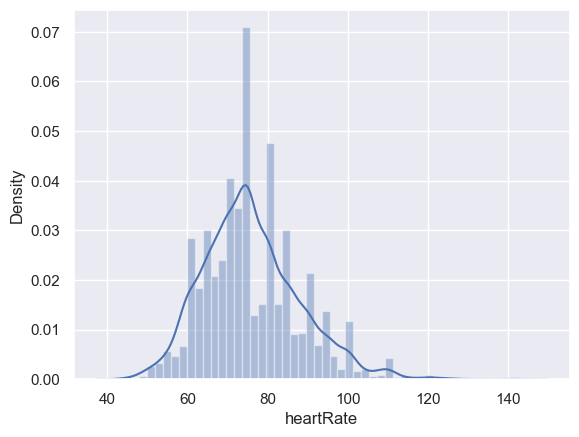

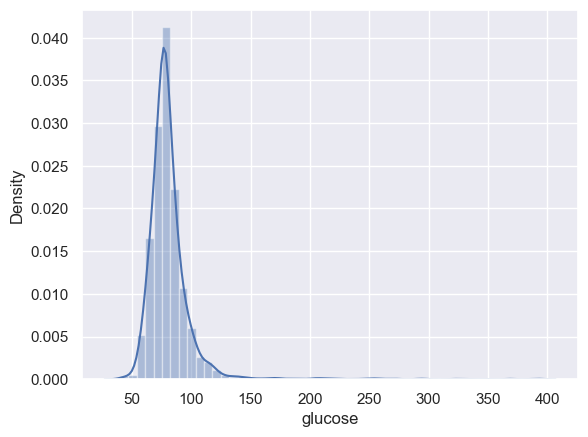

In [33]:
# Distribution of the contineous values column
for i in col:
    sns.distplot(df[i])
    plt.show()

In [34]:
# Making a copy of the clean dataframe
df1 = df.copy()

# To remove outliers
for i in col:
    q1 = df1[i].quantile(q=0.25)
    q2 = df1[i].quantile()
    q3 = df1[i].quantile(q=0.75)
    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr

    df1 = df1[(df1[i]<ul ) & (df1[i]>ll)] 

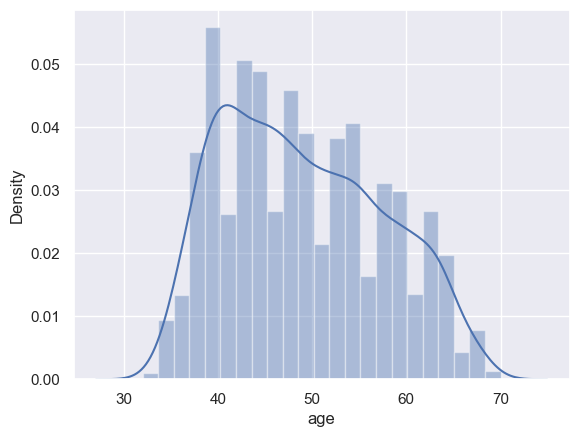

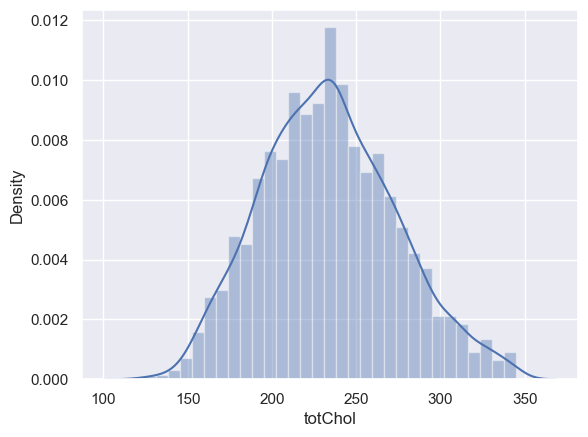

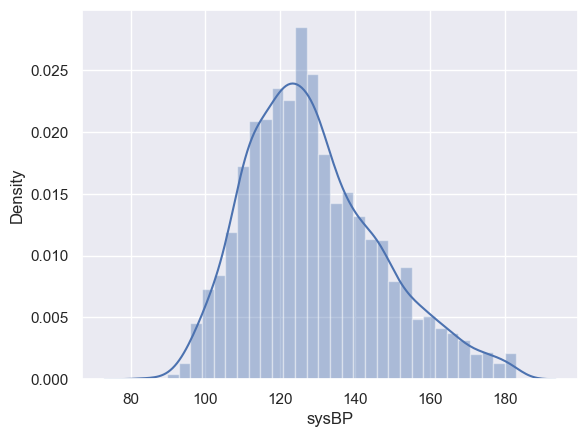

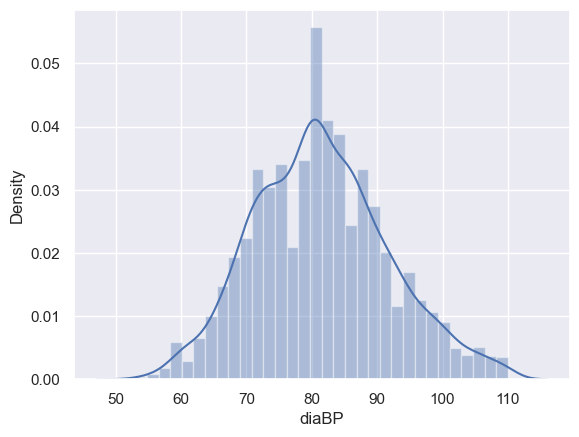

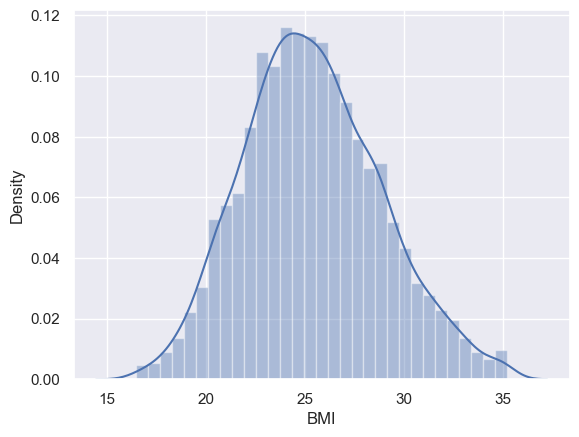

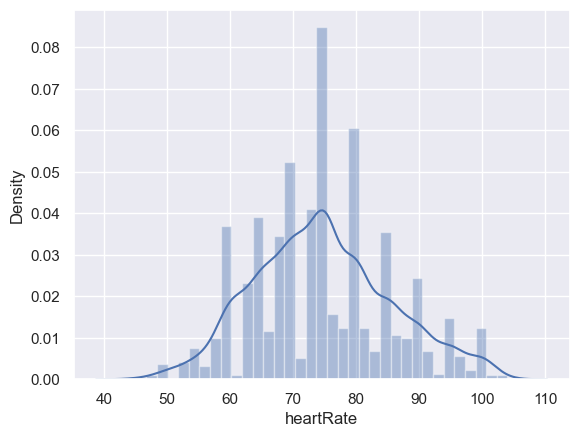

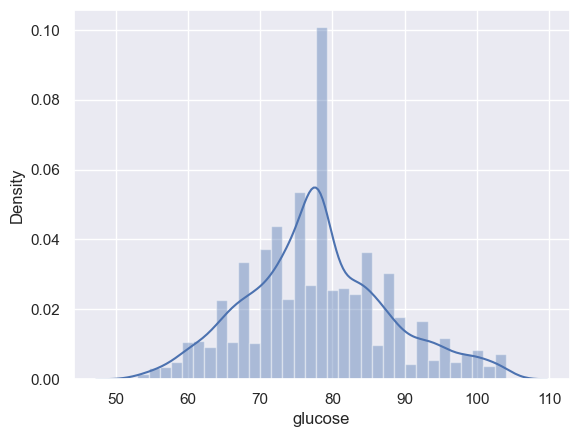

In [35]:
# Checking distribution of the contineous values column after outliers treatment

for i in col:
    sns.distplot(df1[i])
    plt.show()

In [36]:
print('There were {} rows before outlier treatment.'.format(df.shape[0]))
print('There are {} rows after outlier treatment.'.format(df1.shape[0]))
print('After outlier treatment number of rows lost are {}.'.format(df.shape[0] - df1.shape[0]))

There were 4238 rows before outlier treatment.
There are 3637 rows after outlier treatment.
After outlier treatment number of rows lost are 601.


Ratio of CHD=1 and CHD=0:
TenYearCHD
0    0.848042
1    0.151958
Name: proportion, dtype: float64


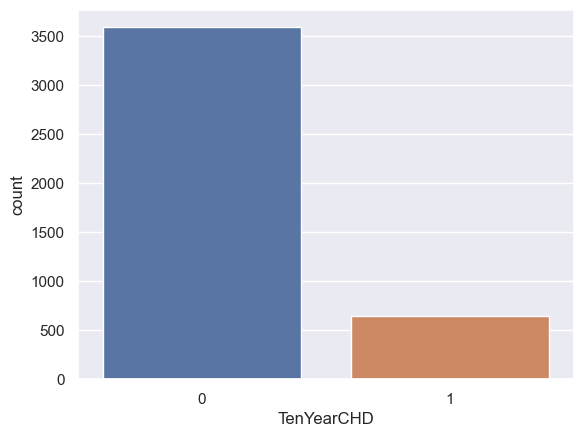

In [37]:
# Calculate the ratio of occurrences of each value in the 'TenYearCHD' column
ratio = df['TenYearCHD'].value_counts(normalize=True)

# Print the ratio
print("Ratio of CHD=1 and CHD=0:")
print(ratio)

# Plotting the ratio
sns.countplot(data=df, x='TenYearCHD', order=df['TenYearCHD'].value_counts().index)
plt.show()

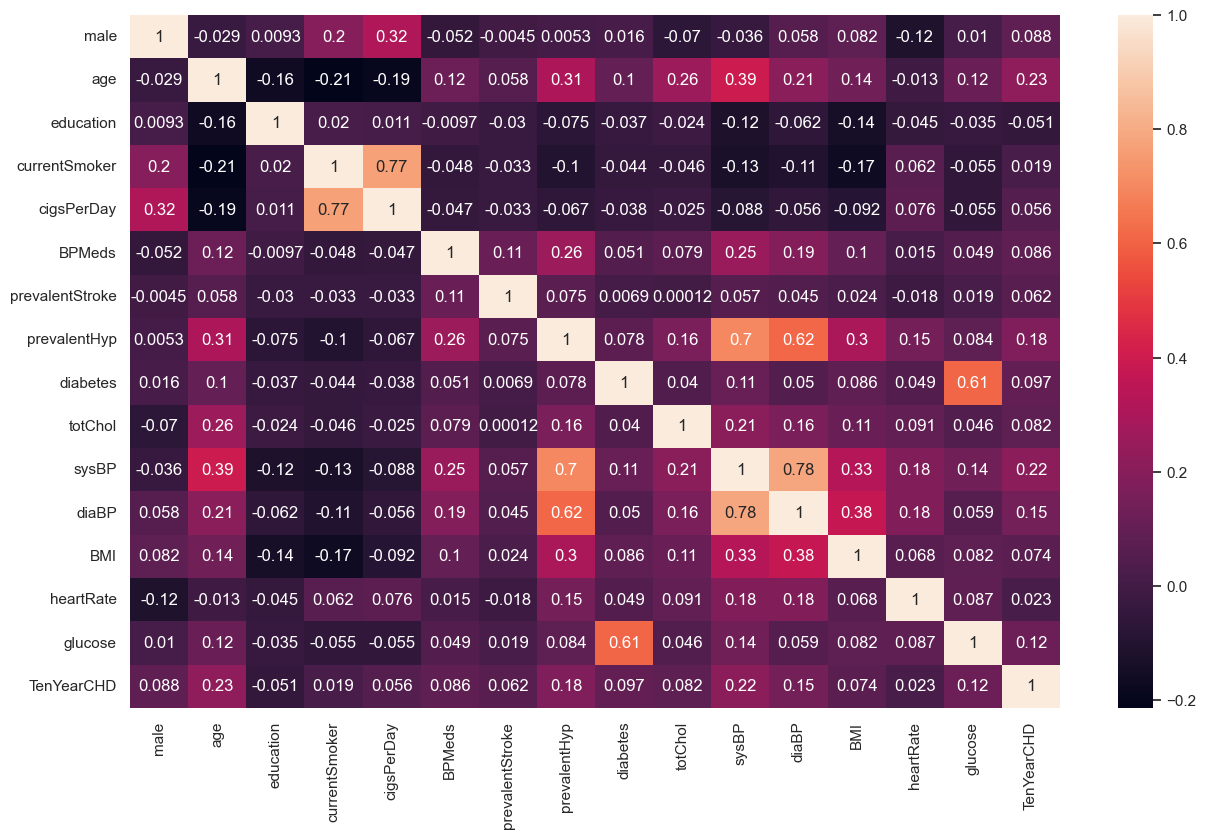

In [38]:
# Correlation plot using heatmap
cor = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(cor,annot=True)
plt.show()

In [39]:
#Splitting the data into dependant and independent
X = df1.drop(['TenYearCHD'], axis=1)
y = df1['TenYearCHD']